# Random Forest Regression
### Random Forest Algorithm:
- Step 1: Pick at random K data points from the training set
- Step 2: Build a Decision Tree for only these K data points (it's like a subset tree)
- Step 3: Choose the number of trees (NTrees) you want to build
    - Repeat Steps 1 and 2, so just keep building and building these trees until having NTrees
- Step 4: Finally, use all decision trees to predict a data point's y-value
    - Make each NTree predict the y-value for the data point
        - The final predicted y-value will be the average of all predicted y-values
        
### Example of a Random Forest Regression
Let's say I have 50 data points. I want 5 trees (NTrees). Therefore, each tree has 10 data points.

If I want to predict when x1 = 5, x2 = 15, and x3 = 500, each decision tree will give their predicted y-value.
- Decision Tree 1 predicted 35
- Decision Tree 2 predicted 25
- Decision Tree 3 predicted 30
- Decision Tree 4 predicted 43
- Decision Tree 5 predicted 42

Now get the average of the NTrees predictions: ```(35 + 25 + 30 + 43 + 42) / 5``` = 35.

Therefore, the predicted value is 35.

# Ensemble Learning
Random Forest Regression is an example of ensemble learning.

Ensemble Learning: When you take multiple algorithms, or the same algorithm multiple times, and put them together to make something more accurate than original.

There are two types of Ensemble Learning algorithms:
- Bagging: Training a bunch of individual models using a random sbuset of the data set
- Boosting: Training a bunch of individual models learning from the mistakes made by the previous model

Random Forest Regression is considered a bagging model because it uses the decision tree model multiple times on random subsets of the data set.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
customers_df = pd.read_csv("datasets/position_salaries.csv")

customers_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# the independent variable is the Level
x = customers_df.iloc[:, 1:2].values

# the dependent variable is the Salary
y = customers_df.iloc[:, 2].values

In [5]:
# import the random forest regressor class
from sklearn.ensemble import RandomForestRegressor

In [13]:
# create a random forest regressor with 10 trees and random state (seed) of 0, then fit to data set
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Non-Continous Visualization
Random Forest Regression is non-continous and non-linear because it uses the decision tree algorithm multiple times, which itself is non-continous and non-linear.

Therefore, we need to increase the x-value resolution by having greater separations.

### Why Are There More Visualized Steps in Random Forest Regression?
Notice that unlike a single decision tree, the random forest regression has more "steps" in the visualization.

This is because the random forest regression uses multiple decision trees.

Multiple decision trees means greater number of splits, leading to more terminal leafs, causing an increase in the number of steps in the visualization.

### Will Increasing Trees Increase Visualized Steps?
Not really, because sooner or later having more trees would converge to the same average because the decision tree algorithm will decide that there's no more valuable informational entropy by splitting into more leafs.

Although you may not be able to see more steps visually, when actually getting prediction values with more trees, the values may be different based on the number of trees used.
- For example, using only 10 trees gives a prediction of 167,000 while 300 trees gives a prediction of 160,333 when predicting level 6.5
    - However, 167,000 versus 160,333 isn't really visually different on a graph
    
#### How Do We Use Many Decision Trees (e.g. 300) on Such a Small Data Set?
Even if we create 300 decision trees for the Random Forest Regression algorithm, many of these decision trees will likely be reproduced (duplicated) in some manner. Even if the algorithm uses reproduced trees,  averaging the trees' predictions could still make a strong final prediction.

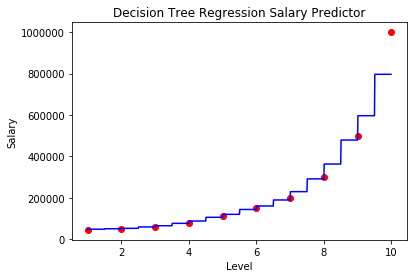

In [12]:
# increase the x-values resolution to 0.01 separations
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)

# scatter plot the actual values
plt.scatter(x, y, color="red")

# line plot the predicted values with higher resolution
plt.plot(x_grid, regressor.predict(x_grid), color="blue")

# labels
plt.title("Decision Tree Regression Salary Predictor")
plt.xlabel("Level")
plt.ylabel("Salary")

plt.show()

In [16]:
# predict level 6.5
y_pred = regressor.predict([[6.5]])

y_pred

array([167000.])